# Analysis, detection & mitigation of felonious wallet accounts over the Ethereum blockchain network using machine learning techniques

|BITS ID No.| Name of Student|Email | Mobile
|-----------|------------------|---|--|
|2019HC04178 | Anjali Sunder Naik|sundernaik.anjali@in.bosch.com|8147757114|

## Import Libraries/Dataset

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [49]:
#constants
invalid_data_path = '../data/invalid/invalid.csv'
json_dump_file_invalid = 'invalid_transactions.json'
verified_open_source_license_data_path = '../data/valid/export-verified-contractaddress-opensource-license.csv'
valid_data_path = '../data/valid/valid.csv'
verified_data_path = '../data/valid/verified-audited.csv'
api_key = '8BPTQD7WQ9NK9IVRZHQEDIQMX4C6MDBQ3C'

## Data Visualization

Total number of felonious accounts in the dataset:  6297


<AxesSubplot:title={'center':'Felonious Ethereum Accounts data'}>

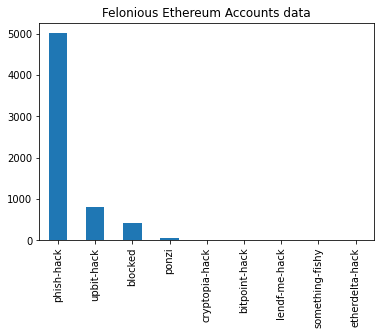

In [64]:
df = pd.read_csv(invalid_data_path)
print("Total number of felonious accounts in the dataset: ",df.shape[0])
plt.title("Felonious Ethereum Accounts data")
df['label'].value_counts().plot(kind='bar')

In [51]:
df = pd.read_csv(verified_open_source_license_data_path)
print("Total number of verified accounts in the dataset with open source license: ",df.shape[0])

Total number of verified accounts in the dataset with open source license:  5000


Total number of audited Ethereum accounts in the dataset:  941


<AxesSubplot:title={'center':'Audited Ethereum Accounts data'}, xlabel='License', ylabel='Number of Ethereum Accounts'>

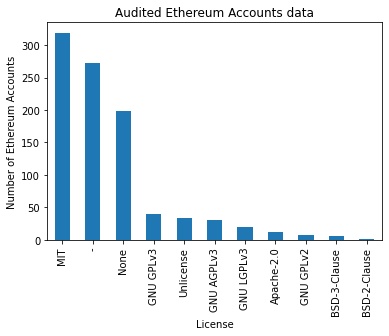

In [52]:
df = pd.read_csv(verified_data_path)
print("Total number of audited Ethereum accounts in the dataset: ",df.shape[0])
plt.title("Audited Ethereum Accounts data")
plt.xlabel("License")
plt.ylabel("Number of Ethereum Accounts")
df['License'].value_counts().plot(kind='bar')

In [54]:
import json
 
def init_json(filename):
    # Initial Data to be written
    dictionary ={"transactions": []}
    # Serializing json 
    json_object = json.dumps(dictionary, indent = 4)
    with open(fileName, "w") as outfile:
        json.dump(dictionary, outfile)

def write_json(new_data, filename):
    
    with open(filename,'r+') as file:
          # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data["transactions"].append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent = 4)

In [61]:
# Fetching the tranasctions for invalid_data_path, we do this in batches of 200-500 to avoid time out

import json


df = pd.read_csv(invalid_data_path)
init_json(json_dump_file_invalid)

In [62]:
for ind in df.index:
    if(ind>=0 and ind <200):
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        write_json(data,json_dump_file_invalid)

In [63]:
%%time
for ind in df.index:
    if(ind>=200 and ind <500):
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        write_json(data,json_dump_file_invalid)

CPU times: user 18min 16s, sys: 46.5 s, total: 19min 3s
Wall time: 22min 51s


In [65]:
%%time
for ind in df.index:
    if(ind>=500 and ind <1000):
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        write_json(data,json_dump_file_invalid)

CPU times: user 50min 14s, sys: 2min 15s, total: 52min 30s
Wall time: 59min 54s


In [67]:
c = 0
for ind in df.index:
    c +=1
print(c)

6297


In [68]:
%%time
for ind in df.index:
    if(ind>=1000 and ind <1200):
        addr= df['Address'][ind]
        r = requests.get('http://api.etherscan.io/api?module=account&action=txlist&address='+addr+'&sort=asc&apikey='+api_key)
        data = r.json()
        data['address']=addr
        write_json(data,json_dump_file_invalid)

CPU times: user 29min 58s, sys: 1min 24s, total: 31min 22s
Wall time: 34min 11s
